# Big Data in Finance: Part II <BR><BR> Lecture Notes 8: CRSP 
    
**Instructor** <BR>
Lira Mota, lmota20@gsb.columbia.edu
    
**TA's:** <BR>
Daheng Yang, dyang22@gsb.columbia.edu

**Objectives:** <BR>
1. Download and understand the basics of CRSP tables:
    1. Monthly Stock Files (MSF)
    2. Monthly Stock Events (MSE)
    2. Risk free rates (MCTI)

2. Create one data frame with the following variables:
    1. Stock exchange code
    2. Security code 
    3. Stock monthly returns
    4. Market Equity Value (AMT*PRC)
    5. Risk Free Rate

    
3. Add variables:
    1. Rankyear - Fama and French yearly rebalancing schedule
    2. Returns adjusted for delisting
    3. ME by PERMCO
    4. ME lag (used for portfolios weights)
    5. Cumulative past 11 months returns (used to calculate momentum portfolios - homework)

## Set Up

In [1]:
%matplotlib inline 

#%% Packages 
import wrds
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

import time
from time import strptime, strftime

# Setups
pd.set_option("display.max_rows", 200) # max number or rows to be displayed 

In [2]:
#%% Set WRDS Connection
db = wrds.Connection(wrds_username='lmota') # make sure to configure wrds connector before hand.

Loading library list...
Done


## How is the CRSP data organized?

In [3]:
libs = db.list_libraries()
# Transform crsp_tables to a Pandas data frame to have a better display.
libs = pd.DataFrame({'libs':libs}).sort_values('libs').reset_index(drop=True) 
libs.head(100)

libs
0                        aha
1                 aha_sample
2                    ahasamp
3                      audit
4           audit_audit_comp
5           audit_corp_legal
6                       bank
7                       blab
8                      block
9                    boardex
10               boardex_eur
11                boardex_na
12               boardex_row
13             boardex_trial
14                boardex_uk
15                  boardsmp
16                       bvd
17             bvd_ama_large
18            bvd_ama_medium
19             bvd_ama_small
20         bvd_ama_verylarge
21              bvd_bvdbankf
22           bvd_orbis_large
23          bvd_orbis_medium
24           bvd_orbis_small
25                   bvdlgcy
26                   bvdsamp
27           calcbench_trial
28                  calcbnch
29                      cboe
30                   centris
31                       ciq
32                ciq_common
33            ciq_common_new
34                ciq_keydev
35               ciq_ratings
36                   ciqsamp
37            ciqsamp_common
38       ciqsamp_transcripts
39                     cisdm
40                     clrvt
41                  clrvtsmp
42                      comp
43                 comp_bank
44           comp_bank_daily
45           comp_emdb_daily
46         comp_emdb_monthly
47            comp_execucomp
48              comp_filings
49               comp_global
50         comp_global_daily
51        comp_segments_hist
52  comp_segments_hist_daily
53             comp_snapshot
54                     compa
55                     compb
56                    compbd
57                     compd
58                  compdcur
59                     compg
60                    compgd
61                     comph
62                     compm
63                  compmcur
64                  compsamp
65                   compseg
66                  compsegd
67                  compsnap
68                  comscore
69                   contrib
70      contrib_char_returns
71  contrib_char_returns_new
72           contrib_general
73       contrib_general_new
74                      crsp
75                crsp_a_ccm
76            crsp_a_indexes
77              crsp_a_stock
78         crsp_a_treasuries
79                crsp_q_ccm
80            crsp_q_indexes
81          crsp_q_indexhist
82        crsp_q_mutualfunds
83              crsp_q_stock
84         crsp_q_treasuries
85                     crspa
86                     crspm
87                     crspq
88                  crspsamp
89                     csmar
90                  dealscan
91                    djones
92                      dmef
93                       doe
94                      emdb
95                      etfg
96                 etfg_samp
97                  etfgsamp
98                    eureka
99        eurekahedge_sample

### All tables in CRSPQ

In [7]:
# crspq: CRSP quartely update
crsp_tables = db.list_tables(library="crspm") 
# crspm: CRSP monthly update - not included in our subscription

# Transform crsp_tables to a Pandas data frame to have a better display.
crsp_tables = pd.DataFrame({'tables':crsp_tables}).sort_values('tables').reset_index(drop=True)  
crsp_tables.head(150)

tables
0                        acti
1                        asia
2                        asib
3                        asic
4                        asio
5                        asix
6                  ccm_lookup
7                  ccm_qvards
8            ccmxpf_linktable
9              ccmxpf_lnkhist
10              ccmxpf_lnkrng
11             ccmxpf_lnkused
12                   comphead
13                   comphist
14                 compmaster
15            crsp_daily_data
16                crsp_header
17          crsp_monthly_data
18                 crsp_names
19     crsp_ziman_daily_index
20   crsp_ziman_monthly_index
21                     cs20yr
22                      cs5yr
23                      cs90d
24                   cst_hist
25                     dport1
26                     dport2
27                     dport3
28                     dport4
29                     dport5
30                     dport6
31                     dport7
32                     dport8
33                     dport9
34                       dsbc
35                       dsbo
36                        dse
37                      dse62
38                dse62delist
39                  dse62dist
40             dse62exchdates
41                 dse62names
42                dse62nasdin
43                dse62shares
44                     dseall
45                   dseall62
46                  dsedelist
47                    dsedist
48               dseexchdates
49                   dsenames
50                  dsenasdin
51                  dseshares
52                        dsf
53                      dsf62
54                     dsfhdr
55                   dsfhdr62
56                        dsi
57                      dsi62
58                       dsia
59                       dsib
60                       dsic
61                       dsio
62                       dsir
63                       dsix
64                       dsiy
65                     dsp500
66                 dsp500list
67                    dsp500p
68                       dssc
69                       dsso
70                   erdport1
71                   erdport2
72                   erdport3
73                   erdport4
74                   erdport5
75                   erdport6
76                   erdport7
77                   erdport8
78                   erdport9
79                   ermport1
80                   ermport2
81                   ermport3
82                   ermport4
83                   ermport5
84             index_type_map
85                       mcti
86                     mhista
87                     mhistn
88                     mhistq
89                     mport1
90                     mport2
91                     mport3
92                     mport4
93                     mport5
94                        mse
95                      mse62
96                mse62delist
97                  mse62dist
98             mse62exchdates
99                 mse62names
100               mse62nasdin
101               mse62shares
102                    mseall
103                  mseall62
104                 msedelist
105                   msedist
106              mseexchdates
107                  msenames
108                 msenasdin
109                 mseshares
110                       msf
111                     msf62
112                    msfhdr
113                  msfhdr62
114                       msi
115                     msi62
116                      msia
117                      msib
118                      msic
119                      msio
120                      msir
121                      msix
122                      msiy
123                    msp500
124                msp500list
125                   msp500p
126                price_type
127             property_type
128                      qcti
129                      qsia
130                      qsib
131                      qsic
132                      qsio
133

We are going to focus on three tables:

1. MSF
2. MSE
3. MCTI

Nice overview can be found [here](https://wrds-www.wharton.upenn.edu/pages/support/manuals-and-overviews/crsp/stocks-and-indices/overview-crsp-us-stock-database/).

### Primary Keys (PK)

* Company identifier: PERMCO
* Security identifier: PERMNO
* Date: monthly or daily

## The Stock/Securities Files Table (sfm or sfd)

### All Variables in SFM

In [5]:
db.describe_table(library="crspq", table="msf")

Approximately 4602260 rows in crspq.msf.


name  nullable              type
0      cusip      True        VARCHAR(8)
1     permno      True  DOUBLE PRECISION
2     permco      True  DOUBLE PRECISION
3     issuno      True  DOUBLE PRECISION
4      hexcd      True  DOUBLE PRECISION
5     hsiccd      True  DOUBLE PRECISION
6       date      True              DATE
7      bidlo      True  DOUBLE PRECISION
8      askhi      True  DOUBLE PRECISION
9        prc      True  DOUBLE PRECISION
10       vol      True  DOUBLE PRECISION
11       ret      True  DOUBLE PRECISION
12       bid      True  DOUBLE PRECISION
13       ask      True  DOUBLE PRECISION
14    shrout      True  DOUBLE PRECISION
15    cfacpr      True  DOUBLE PRECISION
16   cfacshr      True  DOUBLE PRECISION
17    altprc      True  DOUBLE PRECISION
18    spread      True  DOUBLE PRECISION
19  altprcdt      True              DATE
20      retx      True  DOUBLE PRECISION

### Extra Identifiers: names table

In [6]:
db.describe_table(library="crspq", table="stocknames")

Approximately 62339 rows in crspq.stocknames.


name  nullable              type
0      permno      True  DOUBLE PRECISION
1      permco      True  DOUBLE PRECISION
2      namedt      True              DATE
3   nameenddt      True              DATE
4       cusip      True        VARCHAR(8)
5      ncusip      True        VARCHAR(8)
6      ticker      True        VARCHAR(5)
7      comnam      True       VARCHAR(32)
8       hexcd      True  DOUBLE PRECISION
9      exchcd      True  DOUBLE PRECISION
10      siccd      True  DOUBLE PRECISION
11      shrcd      True  DOUBLE PRECISION
12     shrcls      True        VARCHAR(4)
13    st_date      True              DATE
14   end_date      True              DATE
15    namedum      True  DOUBLE PRECISION

In [7]:
## An explample of name change
names_table = db.raw_sql('SELECT * FROM crspq.stocknames')

# Google
names_table[names_table.permno==14542]


permno   permco      namedt   nameenddt     cusip    ncusip ticker  \
7829  14542.0  45483.0  2014-04-03  2015-10-04  02079K10  38259P70   GOOG   
7830  14542.0  45483.0  2015-10-05  2019-12-31  02079K10  02079K10   GOOG   

            comnam  hexcd  exchcd   siccd  shrcd shrcls     st_date  \
7829    GOOGLE INC    3.0     3.0  7375.0   11.0      C  2014-04-30   
7830  ALPHABET INC    3.0     3.0  7375.0   11.0      C  2014-04-30   

        end_date  namedum  
7829  2019-12-31      2.0  
7830  2019-12-31      2.0

In [8]:
# HP
names_table[names_table.permno==32707]


permno   permco      namedt   nameenddt     cusip    ncusip ticker  \
19563  32707.0  20902.0  1962-07-02  1963-03-19  42345210      None     HP   
19564  32707.0  20902.0  1963-03-20  1968-01-01  42345210      None     HP   
19565  32707.0  20902.0  1968-01-02  2019-12-31  42345210  42345210     HP   

                      comnam  hexcd  exchcd   siccd  shrcd shrcls     st_date  \
19563  HELMERICH & PAYNE INC    1.0     2.0  1311.0   11.0   None  1962-07-31   
19564  HELMERICH & PAYNE INC    1.0     1.0  1311.0   11.0   None  1962-07-31   
19565  HELMERICH & PAYNE INC    1.0     1.0  1311.0   11.0   None  1962-07-31   

         end_date  namedum  
19563  2019-12-31      2.0  
19564  2019-12-31      2.0  
19565  2019-12-31      2.0

### Difference between header information and historical information

* Usually "h" in CRSP means header - a static characteristic. Either the most recent observation (hsiccd) or as the time the security was listed (hexcd).
* Historical data: siccd, excd, etc.
* Notice that for CUSIP it is different. Historical cusip is under NCUSIP.

### Variables of interest

1. Identifiers: date, permno, permco
2. Price: prc
3. Return: ret
4. Return Ex-dividend: retx
5. Factor to adjust prices and shares outstading: 'cfacpr'/'cfacshr'


Where to find variable definitions? [WRDS website](https://wrds-www.wharton.upenn.edu/documents/396/CRSP_US_Stock_Indices_Data_Descriptions.pdf).


In [30]:
sfvars = ['prc','vol','ret', 'retx','cfacpr','cfacshr']
query = """SELECT date, permno, permco, {} 
           FROM crsp.msf
           WHERE date>='2000-01-01'""".format(', '.join(sfvars))
print(query)

SELECT date, permno, permco, prc, vol, ret, retx, cfacpr, cfacshr 
           FROM crsp.msf
           WHERE date>='2000-01-01'


In [31]:
msf_data = db.raw_sql(query, date_cols=['date'])
del(sfvars, query) 

**Look at the data =)**

In [11]:
msf_data.head()

date   permno  permco      prc    vol       ret      retx  cfacpr  \
0 2000-01-31  10001.0  7953.0  8.12500  403.0 -0.044118 -0.044118     1.5   
1 2000-02-29  10001.0  7953.0  8.25000  222.0  0.015385  0.015385     1.5   
2 2000-03-31  10001.0  7953.0 -8.00000  723.0 -0.015758 -0.030303     1.5   
3 2000-04-28  10001.0  7953.0 -8.09375  263.0  0.011719  0.011719     1.5   
4 2000-05-31  10001.0  7953.0 -7.90625  221.0 -0.023166 -0.023166     1.5   

   cfacshr  
0      1.5  
1      1.5  
2      1.5  
3      1.5  
4      1.5

In [12]:
# Check if PK 
msf_data.duplicated(subset=['permno', 'date']).sum()

0

In [13]:
msf_data.groupby(['permco', 'date']).permno.nunique().mean() 

1.143723129411066

In [14]:
msf_data.groupby(['permco', 'date']).permno.nunique().max()

287

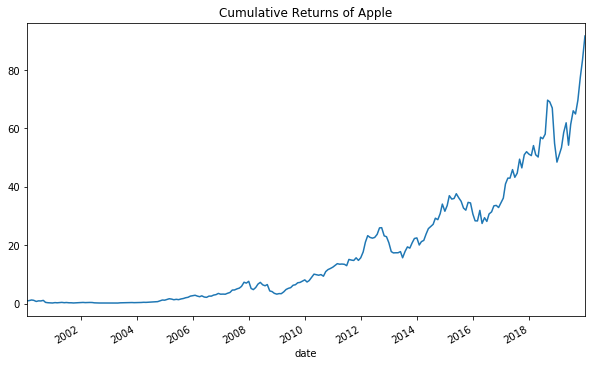

In [15]:
# Cumulative returns of Apple 
apple_ret = msf_data[msf_data.permno==14593].set_index(['date']).ret
((1+apple_ret).cumprod()).plot(title='Cumulative Returns of Apple')

## The Stock/Security Events (mse, mseall, dse, dseall) 

### All variables in MSEALL

In [16]:
db.describe_table(library="crspq", table="mseall")

Approximately 3227600 rows in crspq.mseall.


name  nullable              type
0       date      True              DATE
1     comnam      True       VARCHAR(32)
2      cusip      True        VARCHAR(8)
3     dclrdt      True              DATE
4      dlamt      True  DOUBLE PRECISION
5      dlpdt      True              DATE
6     dlstcd      True  DOUBLE PRECISION
7     hsiccd      True  DOUBLE PRECISION
8     issuno      True  DOUBLE PRECISION
9     ncusip      True        VARCHAR(8)
10    nextdt      True              DATE
11     paydt      True              DATE
12    rcrddt      True              DATE
13    shrcls      True        VARCHAR(1)
14    shrflg      True  DOUBLE PRECISION
15    ticker      True        VARCHAR(5)
16    permno      True  DOUBLE PRECISION
17    permco      True  DOUBLE PRECISION
18     hexcd      True  DOUBLE PRECISION
19    hsicmg      True  DOUBLE PRECISION
20    hsicig      True  DOUBLE PRECISION
21  nameendt      True              DATE
22     shrcd      True  DOUBLE PRECISION
23    exchcd      True  DOUBLE PRECISION
24     siccd      True  DOUBLE PRECISION
25   tsymbol      True       VARCHAR(10)
26     naics      True        VARCHAR(7)
27  primexch      True        VARCHAR(1)
28   trdstat      True        VARCHAR(1)
29   secstat      True        VARCHAR(1)
30    distcd      True  DOUBLE PRECISION
31    divamt      True  DOUBLE PRECISION
32     facpr      True  DOUBLE PRECISION
33    facshr      True  DOUBLE PRECISION
34    acperm      True  DOUBLE PRECISION
35    accomp      True  DOUBLE PRECISION
36    shrout      True  DOUBLE PRECISION
37  shrenddt      True              DATE
38    nwperm      True  DOUBLE PRECISION
39    nwcomp      True  DOUBLE PRECISION
40    dlretx      True  DOUBLE PRECISION
41     dlprc      True  DOUBLE PRECISION
42     dlret      True  DOUBLE PRECISION
43    trtscd      True  DOUBLE PRECISION
44  trtsendt      True              DATE
45    nmsind      True  DOUBLE PRECISION
46     mmcnt      True  DOUBLE PRECISION
47    nsdinx      True  DOUBLE PRECISION
48      year      True  DOUBLE PRECISION
49     month      True  DOUBLE PRECISION

### Variables of Interest 
1. Delisting returns: dlret, dlretx
2. Exchange codes: exchcd - 1 (NYSE), 2 (NYSE MKT), 3 (NASDAQ), 4 (Arca) or 5 (Bats).
3. Share Type Code: shrcd (usually we only look at Ordinary Common Shares, 10 and 11)
4. Industry classifications: siccd, naics
5. Stock Ticker


In [17]:
msevars = ['dlret', 'dlretx', 'exchcd','naics', 'ncusip', 'shrcd', 'shrout', 
           'siccd','ticker', 'distcd','facpr','facshr']
query = """SELECT date, permno, permco, {} 
           FROM crspq.mseall
           WHERE date>='2000-01-01'""".format(', '.join(msevars))
print(query)

SELECT date, permno, permco, dlret, dlretx, exchcd, naics, ncusip, shrcd, shrout, siccd, ticker, distcd, facpr, facshr 
           FROM crspq.mseall
           WHERE date>='2000-01-01'


In [18]:
mse_data = db.raw_sql(query, date_cols=['date'])
del(msevars, query) 

**Look at the data...**

In [19]:
mse_data[mse_data.permno==14593] 

date   permno  permco  dlret  dlretx  exchcd   naics    ncusip  \
191760 2000-01-31  14593.0     7.0    NaN     NaN     3.0    None  03783310   
191761 2000-02-29  14593.0     7.0    NaN     NaN     3.0    None  03783310   
191762 2000-03-31  14593.0     7.0    NaN     NaN     3.0    None  03783310   
191763 2000-04-28  14593.0     7.0    NaN     NaN     3.0    None  03783310   
191764 2000-05-31  14593.0     7.0    NaN     NaN     3.0    None  03783310   
...           ...      ...     ...    ...     ...     ...     ...       ...   
191996 2019-08-30  14593.0     7.0    NaN     NaN     3.0  334220  03783310   
191997 2019-09-30  14593.0     7.0    NaN     NaN     3.0  334220  03783310   
191998 2019-10-31  14593.0     7.0    NaN     NaN     3.0  334220  03783310   
191999 2019-11-29  14593.0     7.0    NaN     NaN     3.0  334220  03783310   
192000 2019-12-31  14593.0     7.0    NaN     NaN     3.0  334220  03783310   

        shrcd     shrout   siccd ticker  distcd  facpr  facshr  
191760   11.0   161159.0  3573.0   AAPL     NaN    NaN     NaN  
191761   11.0   161159.0  3573.0   AAPL     NaN    NaN     NaN  
191762   11.0   162680.0  3573.0   AAPL     NaN    NaN     NaN  
191763   11.0   162680.0  3573.0   AAPL     NaN    NaN     NaN  
191764   11.0   162744.0  3573.0   AAPL     NaN    NaN     NaN  
...       ...        ...     ...    ...     ...    ...     ...  
191996   11.0  4519180.0  3571.0   AAPL  1232.0    0.0     0.0  
191997   11.0  4443236.0  3571.0   AAPL     NaN    NaN     NaN  
191998   11.0  4443265.0  3571.0   AAPL     NaN    NaN     NaN  
191999   11.0  4443265.0  3571.0   AAPL  1232.0    0.0     0.0  
192000   11.0  4443265.0  3571.0   AAPL     NaN    NaN     NaN  

[240 rows x 15 columns]

### Check Primary Key

In [20]:
# Check PK
mse_data.duplicated(subset=['date','permno']).sum()

18823

In [21]:
# Check Duplicates
mse_data[mse_data.duplicated(subset=['date','permno'])]

date   permno   permco     dlret    dlretx  exchcd   naics  \
98      2008-02-29  10001.0   7953.0       NaN       NaN     3.0  221210   
697     2017-01-31  10025.0   7975.0 -0.050551 -0.050551     3.0  326113   
1683    2005-06-30  10044.0   7992.0       NaN       NaN     3.0  311330   
2148    2000-02-29  10065.0  20023.0       NaN       NaN     1.0    None   
2158    2000-11-30  10065.0  20023.0       NaN       NaN     1.0    None   
...            ...      ...      ...       ...       ...     ...     ...   
1673222 2012-12-31  93412.0  51187.0  0.002681  0.002632     4.0  525990   
1673230 2010-12-31  93413.0  51187.0       NaN       NaN     4.0  525990   
1673231 2010-12-31  93413.0  51187.0       NaN       NaN     4.0  525990   
1673232 2010-12-31  93413.0  51187.0       NaN       NaN     4.0  525990   
1673577 2010-12-31  93417.0  53120.0       NaN       NaN     4.0  525990   

           ncusip  shrcd   shrout   siccd ticker  distcd     facpr    facshr  
98       29274A20   11.0   4345.0  4920.0   EWST  1222.0  0.000000  0.000000  
697      00103110   11.0   5114.0  3081.0   AEPI  3723.0 -1.000000 -1.000000  
1683     77467840   11.0   6187.0  2060.0   RMCF  5523.0  0.333333  0.333333  
2148     00621210   14.0  53453.0  6723.0    ADX  2216.0  0.000000  0.000000  
2158     00621210   14.0  79186.0  6723.0    ADX  2216.0  0.000000  0.000000  
...           ...    ...      ...     ...    ...     ...       ...       ...  
1673222  18383M59   73.0   4950.0  6726.0   BSCC  2255.0 -1.000000 -1.000000  
1673230  18383M88   73.0   1100.0  6726.0   BSCB  1262.0  0.000000  0.000000  
1673231  18383M88   73.0   1100.0  6726.0   BSCB  1272.0  0.000000  0.000000  
1673232  18383M88   73.0   1100.0  6726.0   BSCB  2216.0  0.000000  0.000000  
1673577  37950E78   73.0   1800.0  6726.0   BRAZ  2216.0  0.000000  0.000000  

[18823 rows x 15 columns]

In [22]:
mse_data[(mse_data.permno==10001)&(mse_data.date=='2008-02-29')] 

date   permno  permco  dlret  dlretx  exchcd   naics    ncusip  \
97 2008-02-29  10001.0  7953.0    NaN     NaN     3.0  221210  29274A20   
98 2008-02-29  10001.0  7953.0    NaN     NaN     3.0  221210  29274A20   

    shrcd  shrout   siccd ticker  distcd  facpr  facshr  
97   11.0  4345.0  4920.0   EWST  5523.0    0.5     0.5  
98   11.0  4345.0  4920.0   EWST  1222.0    0.0     0.0

### DISTCD causes duplicates
* DISTCD: event code that records list of events describing cash dividends, capital adjustments, and other distributions made to shareholders of a security;
* For stock/date there might be multiple events.
* For example, in the case of Energy West (EWST)
    * 1222: US cash dividend, monthly, taxable same rate as dividends
    * 5523: Stock split, non-taxable 

In [25]:
# Redownlod without distcd 
msevars = ['comnam', 'dlret', 'dlretx', 'exchcd','naics', 'ncusip', 'shrcd', 'shrout', 
           'siccd','ticker']
query = """SELECT date, permno, permco, {} 
           FROM crspq.mseall
           WHERE date>='2000-01-01'""".format(', '.join(msevars))
print(query)

SELECT date, permno, permco, comnam, dlret, dlretx, exchcd, naics, ncusip, shrcd, shrout, siccd, ticker 
           FROM crspq.mseall
           WHERE date>='2000-01-01'


In [26]:
mse_data = db.raw_sql(query, date_cols=['date'])
del(msevars, query) 

In [25]:
mse_data = mse_data[~mse_data.duplicated()].copy()

In [26]:
# Check PK
mse_data.duplicated(subset=['date','permno']).sum()

0

In [27]:
mse_data.head()

date   permno  permco           comnam  dlret  dlretx  exchcd naics  \
0 2000-01-31  10001.0  7953.0  ENERGY WEST INC    NaN     NaN     3.0  None   
1 2000-02-29  10001.0  7953.0  ENERGY WEST INC    NaN     NaN     3.0  None   
2 2000-03-31  10001.0  7953.0  ENERGY WEST INC    NaN     NaN     3.0  None   
3 2000-04-28  10001.0  7953.0  ENERGY WEST INC    NaN     NaN     3.0  None   
4 2000-05-31  10001.0  7953.0  ENERGY WEST INC    NaN     NaN     3.0  None   

     ncusip  shrcd  shrout   siccd ticker  
0  29274A10   11.0  2450.0  4920.0   EWST  
1  29274A10   11.0  2450.0  4920.0   EWST  
2  29274A10   11.0  2464.0  4920.0   EWST  
3  29274A10   11.0  2464.0  4920.0   EWST  
4  29274A10   11.0  2464.0  4920.0   EWST

## Merge MSF and MSEALL

When merging mse and msf tables we should copy information from event observations to succeeding non-event observations.

Check data types: for some reason the merge does not work for PERMNO as float

In [28]:
msf_data.dtypes

date       datetime64[ns]
permno            float64
permco            float64
prc               float64
vol               float64
ret               float64
retx              float64
cfacpr            float64
cfacshr           float64
dtype: object

In [29]:
## Check data types
mse_data.dtypes       

date      datetime64[ns]
permno           float64
permco           float64
comnam            object
dlret            float64
dlretx           float64
exchcd           float64
naics             object
ncusip            object
shrcd            float64
shrout           float64
siccd            float64
ticker            object
dtype: object

In [30]:
# Change Permno Data Type.
msf_data['permno'] = msf_data['permno'].astype('int')
mse_data['permno'] = mse_data['permno'].astype('int')

In [31]:
msf_data.sort_values(['date', 'permno'], inplace=True)
mse_data.sort_values(['date', 'permno'], inplace=True)

**Merge tables with following logic:**
* For each msf observation, merge most recent mseall observation with same permno,
* If particular permno-date combination does not exist in msf but does in mseall, do not include that observation.
 
**How to do this?** Pandas is powerful! 

In [32]:
from IPython.display import IFrame
IFrame('https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge_asof.html', width=900, height=400)

In [33]:
# Check of coverage
x = pd.Series(msf_data.permno.unique())
y = pd.Series(mse_data.permno.unique())
x[~x.isin(y)]

Series([], dtype: int64)

In [34]:
y[~y.isin(x)]

1641     53938
4271     80139
7456     86564
8449     10247
8455     77351
8458     79030
8460     85163
8717     80052
9667     48435
10023    41989
10282    64064
11295    22162
12128    41276
14125    35502
14868    12141
15558    63888
15804    10349
16811    33136
17714    43095
dtype: int64

In [35]:
# Check if delisting happens only once per security
mse_data[mse_data.dlret.notnull()].groupby(['permno']).date.value_counts().max()

1

In [36]:
# Check if delisting returns only appears after the firm is not longer covered by msf
test = mse_data[mse_data.dlret.notnull()]
test = pd.merge(msf_data, test[['permno', 'dlret', 'date']], on=['permno'])
test[test.date_x>test.date_y]

Empty DataFrame
Columns: [date_x, permno, permco, prc, vol, ret, retx, cfacpr, cfacshr, dlret, date_y]
Index: []

In [37]:
crsp = pd.merge_asof(msf_data, 
                     mse_data, 
                     on='date', 
                     by=['permno','permco'], 
                     direction='backward')

In [38]:
crsp.columns

Index(['date', 'permno', 'permco', 'prc', 'vol', 'ret', 'retx', 'cfacpr',
       'cfacshr', 'comnam', 'dlret', 'dlretx', 'exchcd', 'naics', 'ncusip',
       'shrcd', 'shrout', 'siccd', 'ticker'],
      dtype='object')

In [39]:
crsp[crsp.ticker=='GOOG']

date  permno   permco          prc        vol       ret  \
428638  2004-08-31   90319  45483.0   102.370003   669547.0       NaN   
435537  2004-09-30   90319  45483.0   129.600006  1066083.0  0.265996   
442459  2004-10-29   90319  45483.0   190.639999  2580994.0  0.470988   
449383  2004-11-30   90319  45483.0   181.979996  2788008.0 -0.045426   
456317  2004-12-31   90319  45483.0   192.789993  1457027.0  0.059402   
463231  2005-01-31   90319  45483.0   195.619995  2049127.0  0.014679   
470156  2005-02-28   90319  45483.0   187.990005  3270253.0 -0.039004   
477081  2005-03-31   90319  45483.0   180.509995  1729960.0 -0.039789   
484003  2005-04-29   90319  45483.0   220.000000  2287125.0  0.218769   
490926  2005-05-31   90319  45483.0   277.269989  2550630.0  0.260318   
497858  2005-06-30   90319  45483.0   294.149994  3933185.0  0.060879   
504793  2005-07-29   90319  45483.0   287.760010  2074660.0 -0.021724   
511739  2005-08-31   90319  45483.0   286.000000  1437427.0 -0.006116   
518664  2005-09-30   90319  45483.0   316.459991  1706402.0  0.106503   
525594  2005-10-31   90319  45483.0   372.140015  1943227.0  0.175946   
532528  2005-11-30   90319  45483.0   404.912506  2122959.0  0.088065   
539468  2005-12-30   90319  45483.0   414.859985  1995561.0  0.024567   
546371  2006-01-31   90319  45483.0   432.660095  3005793.0  0.042906   
553268  2006-02-28   90319  45483.0   362.619995  2980687.0 -0.161883   
560167  2006-03-31   90319  45483.0   390.000000  3085112.0  0.075506   
567063  2006-04-28   90319  45483.0   417.940002  1860789.0  0.071641   
573976  2006-05-31   90319  45483.0   371.820007  1751990.0 -0.110351   
580929  2006-06-30   90319  45483.0   419.329987  1429713.0  0.127777   
587877  2006-07-31   90319  45483.0   386.600006  1283161.0 -0.078053   
594823  2006-08-31   90319  45483.0   378.529999  1073442.0 -0.020874   
601787  2006-09-29   90319  45483.0   401.899994  1220121.0  0.061739   
608788  2006-10-31   90319  45483.0   476.390015  1591003.0  0.185345   
615804  2006-11-30   90319  45483.0   484.809998  1185340.0  0.017675   
622826  2006-12-29   90319  45483.0   460.480011   921713.0 -0.050185   
629849  2007-01-31   90319  45483.0   501.500000  1251505.0  0.089081   
636907  2007-02-28   90319  45483.0   449.450012  1142896.0 -0.103789   
643988  2007-03-30   90319  45483.0   458.160004  1183525.0  0.019379   
651079  2007-04-30   90319  45483.0   471.380005   934070.0  0.028855   
658205  2007-05-31   90319  45483.0   497.908997  1010372.0  0.056279   
665340  2007-06-29   90319  45483.0   522.700073  1294012.0  0.049790   
672469  2007-07-31   90319  45483.0   510.000000  1169390.0 -0.024297   
679594  2007-08-31   90319  45483.0   515.250000   888128.0  0.010294   
686684  2007-09-28   90319  45483.0   567.270020   695757.0  0.100961   
693800  2007-10-31   90319  45483.0   707.000000  1555578.0  0.246320   
700939  2007-11-30   90319  45483.0   693.000000  1715504.0 -0.019802   
708090  2007-12-31   90319  45483.0   691.479980   849369.0 -0.002193   
715218  2008-01-31   90319  45483.0   564.299988  1578814.0 -0.183924   
722352  2008-02-29   90319  45483.0   471.179993  1773771.0 -0.165019   
729469  2008-03-31   90319  45483.0   440.470001  1457614.0 -0.065177   
736565  2008-04-30   90319  45483.0   574.289978  1433911.0  0.303812   
743658  2008-05-30   90319  45483.0   585.799988  1046111.0  0.020042   
750738  2008-06-30   90319  45483.0   526.419983   938537.0 -0.101366   
757820  2008-07-31   90319  45483.0   473.750000  1037605.0 -0.100053   
764873  2008-08-29   90319  45483.0   463.290009   688428.0 -0.022079   
771902  2008-09-30   90319  45483.0   400.519989  1399122.0 -0.135488   
778901  2008-10-31   90319  45483.0   359.359985  1996126.0 -0.102766   
785872  2008-11-28   90319  45483.0   292.959991  1581598.0 -0.184773   
792821  2008-12-31   90319  45483.0   307.649994  1146900.0  0.050143   
799725  2009-01-30   90319  45483.0   338.529999  1162305.0  0.100374   

In [40]:
# Check Primary Key
crsp.duplicated(subset=['permno','date']).sum()

0

In [41]:
# Check Apple
crsp[crsp.permno==14593].tail()

date  permno  permco         prc        vol       ret      retx  \
1696055 2019-08-30   14593     7.0  208.740005  6836722.0 -0.016570 -0.020184   
1703695 2019-09-30   14593     7.0  223.970001  5472803.0  0.072962  0.072962   
1711356 2019-10-31   14593     7.0  248.759995  6227831.0  0.110684  0.110684   
1719029 2019-11-29   14593     7.0  267.250000  4495545.0  0.077424  0.074329   
1726710 2019-12-31   14593     7.0  293.649994  5984993.0  0.098784  0.098784   

         cfacpr  cfacshr     comnam  dlret  dlretx  exchcd   naics    ncusip  \
1696055     1.0      1.0  APPLE INC    NaN     NaN     3.0  334220  03783310   
1703695     1.0      1.0  APPLE INC    NaN     NaN     3.0  334220  03783310   
1711356     1.0      1.0  APPLE INC    NaN     NaN     3.0  334220  03783310   
1719029     1.0      1.0  APPLE INC    NaN     NaN     3.0  334220  03783310   
1726710     1.0      1.0  APPLE INC    NaN     NaN     3.0  334220  03783310   

         shrcd     shrout   siccd ticker  
1696055   11.0  4519180.0  3571.0   AAPL  
1703695   11.0  4443236.0  3571.0   AAPL  
1711356   11.0  4443265.0  3571.0   AAPL  
1719029   11.0  4443265.0  3571.0   AAPL  
1726710   11.0  4443265.0  3571.0   AAPL

## Calculate Variables of Interest

### Adjusted Returns

Add to the ret series the delisting returns

In [42]:
# Returns adjusted for delisting
crsp['retadj'] = ((1+crsp['ret'].fillna(0))*(1+crsp['dlret'].fillna(0))-1)
crsp.loc[crsp[['ret', 'dlret']].isnull().all(axis=1), 'retadj'] = np.nan

### Market Equity Value

#### Can prices be negative?

In [43]:
(crsp.prc<0).mean()      

0.033217975510599726

**Why Negative Prices?**<BR><BR>

* If the closing price is not available for any given period, the number in the price field is replaced with a bid/ask average. 
* Bid/ask averages have dashes placed in front of them. 
* These do not incorrectly reflect negative prices; they serve to distinguish bid/ask averages from actual closing prices. If neither the price nor bid/ask average is available, the field is set to zero.

#### Can number of shares outstanding be negative? 

In [44]:
(crsp.shrout<0).sum()

0

#### Create Market Equity (ME)

In [45]:
# SHROUT is the number of publicly held shares, recorded in thousands. ME will be reported in 1,000,000 ($10^6$),
# Like on Ken French's website. 
crsp['me'] = abs(crsp['prc']) * (crsp['shrout']/1000)

In [46]:
# Also, some companies have multiple shareclasses (=PERMNOs).
# To get the company ME, we need to calculate the sum of ME over all shareclasses for one company (=PERMCO).
# This is used for sorting, but not for weights.

# Create MEsum
crsp['mesum'] = crsp.groupby(['date', 'permco']).me.transform(np.sum, min_count=1)

In [47]:
# If the stock is delisted, we set ME to NaN.
crsp.loc[crsp.dlret.notnull(), 'me'] = np.nan
crsp.loc[crsp.dlret.notnull(), 'mesum'] = np.nan

#### Adjusting for Stock Splits and Other Corporate Actions

* Returns are already adjusted for splits, but prices and shares outstanding are not. 
* To adjust prices and shares outstanding, use the following use:
    * Adjusted prices = PRC / CFACPR
    * Adjusted shares = SHROUT * CFACSHR

### ME Lag

MElag is used as portfolio weights in the FF factors.

In [48]:
crsp.sort_values(['permno','date'], inplace=True)

In [49]:
crsp['melag_nt']=crsp.groupby(['permno']).me.shift(1)

In [50]:
# TODO: Check for skipping
# What to do if ME is missing?

crsp['melag'] = crsp.groupby('permno').melag_nt.fillna(method='pad')

# Fill na after delisting
#df = post_event_nan(df=df, event=df.lag_dlret.notnull(), vars=['melag'], id_vars=['permno', 'edate'])

### Rankyear

In [51]:
# Portfolios are rebalanced in the end of june
crsp['rankyear'] = crsp.date.dt.year
crsp.loc[crsp.date.dt.month <= 6, 'rankyear'] = crsp.loc[crsp.date.dt.month <= 6, 'rankyear'] - 1

## Add Risk Free

In [52]:
# Dowload the data
#%% Import Data
query = "SELECT caldt as date, t30ret as rf FROM crspq.mcti"
rf = db.raw_sql(query, date_cols=['date'])

In [53]:
rf.head()

date        rf
0 1925-12-31       NaN
1 1926-01-30  0.002951
2 1926-02-27  0.002768
3 1926-03-31  0.002778
4 1926-04-30  0.003072

In [54]:
# Month dates: dates do not match directly to the ones in CRSP
rf['mdate'] = rf.date.dt.year*100+rf.date.dt.month

In [55]:
rf.drop(columns=['date'], inplace=True)

In [56]:
crsp['mdate']=crsp.date.dt.year*100+crsp.date.dt.month

In [57]:
crsp = pd.merge(crsp, rf, on=['mdate'])

In [58]:
crsp.rf.isnull().sum()

0

In [59]:
crsp.columns

Index(['date', 'permno', 'permco', 'prc', 'vol', 'ret', 'retx', 'cfacpr',
       'cfacshr', 'comnam', 'dlret', 'dlretx', 'exchcd', 'naics', 'ncusip',
       'shrcd', 'shrout', 'siccd', 'ticker', 'retadj', 'me', 'mesum',
       'melag_nt', 'melag', 'rankyear', 'mdate', 'rf'],
      dtype='object')

## Save Output

In [60]:
crsp.head()

date  permno  permco     prc      vol       ret      retx  cfacpr  \
0 2000-01-31   10001  7953.0   8.125    403.0 -0.044118 -0.044118     1.5   
1 2000-01-31   10002  7954.0  11.875    567.0 -0.025641 -0.025641     1.0   
2 2000-01-31   10009  7965.0  14.625    455.0 -0.008475 -0.008475     1.0   
3 2000-01-31   10012  7969.0   7.250  62368.0 -0.097276 -0.097276     1.0   
4 2000-01-31   10016  1728.0  17.000  10387.0 -0.099338 -0.099338     1.0   

   cfacshr                            comnam  ...   siccd  ticker    retadj  \
0      1.5                   ENERGY WEST INC  ...  4920.0    EWST -0.044118   
1      1.0  SOUTH ALABAMA BANCORPORATION INC  ...  6020.0    SABC -0.025641   
2      1.0              IROQUOIS BANCORP INC  ...  6030.0    IROQ -0.008475   
3      1.0    DENSE PACIFIC MICROSYSTEMS INC  ...  3670.0    DPAC -0.097276   
4      1.0            SCOTT TECHNOLOGIES INC  ...  3560.0    SCTT -0.099338   

           me       mesum  melag_nt  melag  rankyear   mdate        rf  
0   19.906250   19.906250       NaN    NaN      1999  200001  0.004343  
1   91.781875   91.781875       NaN    NaN      1999  200001  0.004343  
2   33.739875   33.739875       NaN    NaN      1999  200001  0.004343  
3  139.736500  139.736500       NaN    NaN      1999  200001  0.004343  
4  303.773000  303.773000       NaN    NaN      1999  200001  0.004343  

[5 rows x 27 columns]

In [61]:
crsp.to_pickle(path='/Users/liramertens/Dropbox/Columbia/BigData/class2020/lecture_outputs/crsp_montly.pkl')

In [10]:
sql = """SELECT permno, date, prc, permco AS permco_sf, shrout AS shrout_sf
          FROM crspm.msf
          WHERE date >= DATE '1925-01-01'
          AND date <= DATE '2020-04-01' 
          """" 

SyntaxError: EOL while scanning string literal (<ipython-input-10-7793278abcb7>, line 5)